# 12주차 실습문제 - 분산분석과 사후검정

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

***

In [34]:
# 아래의 라이브러리를 사용하므로 미리 임포트해 두기 바랍니다.
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

import statsmodels.formula.api as smf
import statsmodels.api as sm

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')  # 한글폰트 설정 "맑은 고딕"
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

data = pd.read_csv('health2018.csv')

In [35]:
# Seaborn 라이브러리 내장 "Iris" 데이터셋 불러오기
iris = sns.load_dataset("iris")
iris = iris.iloc[::2,:]
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica
142,5.8,2.7,5.1,1.9,virginica
144,6.7,3.3,5.7,2.5,virginica
146,6.3,2.5,5.0,1.9,virginica


### 1-1. 붓꽃의 종(species)에 따라 꽃받침 넓이(sepal_width)가 어떻게 다른지 boxplot 및 barplot으로 시각화하시오.
barplot에서 나오는 오차막대는 무엇을 의미하는지 설명하시오.

<Axes: xlabel='species', ylabel='sepal_width'>

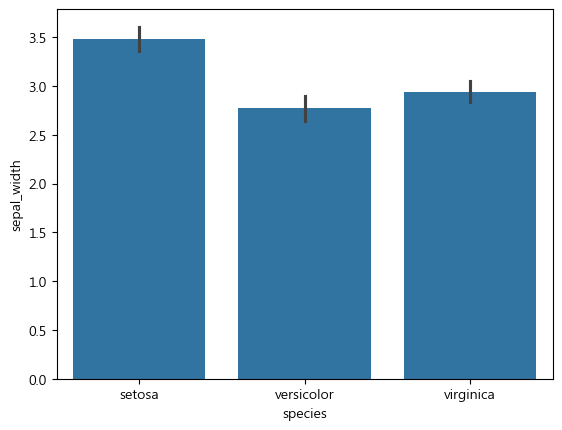

In [28]:
sns.barplot(data = iris, y = 'sepal_width', x = 'species')

- barplot 에 나오는 오차 막대는 신뢰구간 95% 를 뜻한다.

<Axes: xlabel='species', ylabel='sepal_width'>

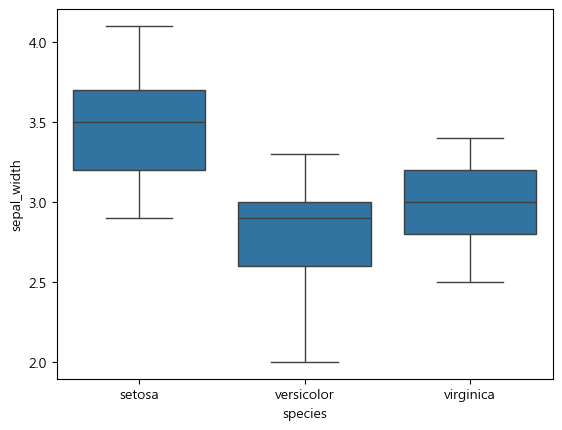

In [29]:
sns.boxplot(data = iris, y = 'sepal_width', x = 'species')

### 1-2. 붓꽃의 종(species)에 따라 꽃받침 넓이(sepal_width)에 차이가 있는지 one-way ANOVA를 통해 검정해보시오.
세 그룹 간에 통계적으로 유의한 차이가 있는가? p 값 및 통계적 유의성을 이야기하시오.

In [30]:
width1 = iris[iris.species == 'setosa'].sepal_width
width2 = iris[iris.species == 'versicolor'].sepal_width
width3 = iris[iris.species == 'virginica'].sepal_width

oneway_anova = stats.f_oneway(width1, width2, width3)
oneway_anova

F_onewayResult(statistic=np.float64(33.93864215306236), pvalue=np.float64(4.140673250988875e-11))

- p값이 0.05 이하이므로 세 그룹 간에 통계적으로 유의한 차이가 난다.

### 1-3. 위 결과가 통계적으로 유의하다면 사후 검정으로 Tukey's HSD test를 시행해보시오.
어느 그룹 사이에 통계적으로 유의한 차이가 나는가? 통계적으로 유의한 group 쌍을 모두 명시하시오.

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(iris['sepal_width'], iris['species'], alpha=0.05)
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
setosa,versicolor,-0.704,0.0,-0.9184,-0.4896,True
setosa,virginica,-0.544,0.0,-0.7584,-0.3296,True
versicolor,virginica,0.16,0.1815,-0.0544,0.3744,False


setosa - versicolor, setosa - virginica 사이에 통계적으로 유의한 차이가 난다.

---

In [32]:
# 국민건강영양조사 데이터
data = pd.read_csv('health2018.csv')

# 체중 구분 추가
BMI_cut = [0, 18.5, 25, 100]
BMI_names = ['저체중', '정상', '비만']
data['obesity'] = pd.cut(data.BMI, BMI_cut, labels = BMI_names)

# 20대 선별
data20s = data[data.age < 30]
data20s.head()

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity
12,A901024803,M,27,188.4,126.7,106.9,35.695611,90,비만
13,A901024804,M,26,177.9,85.5,90.5,27.015575,96,비만
68,A903022202,F,23,158.8,42.5,61.6,16.853416,86,저체중
104,A904024203,M,29,188.2,67.0,71.6,18.916273,93,정상
113,A904027203,F,26,169.9,58.5,66.5,20.266050,85,정상


### 2-1. 체중 그룹(obesity)에 따라 키가 다른지 one-way ANOVA 및 사후검정(Tukey's HSD test)으로 검정하시오.

In [33]:
Glucose1 = data20s[data20s.obesity == '저체중'].height
Glucose2 = data20s[data20s.obesity == '정상'].height
Glucose3 = data20s[data20s.obesity == '비만'].height

oneway_anova_result = stats.f_oneway(Glucose1, Glucose2, Glucose3)
oneway_anova_result

F_onewayResult(statistic=np.float64(16.63900482367357), pvalue=np.float64(8.566318610113073e-08))

In [18]:
posthoc = pairwise_tukeyhsd(data20s['height'], data20s['obesity'], alpha=0.05)
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
비만,저체중,-6.4427,0.0,-9.4104,-3.475,True
비만,정상,-3.3869,0.0,-5.1093,-1.6646,True
저체중,정상,3.0557,0.0232,0.3341,5.7773,True


### 2-2. 체중 그룹별로 성별 분포를 countplot을 통해 비교하시오.
x축을 체중그룹(저체중, 정상, 비만)으로 표시하고, 각각마다 남/여가 다른 색상으로 나타나도록 시각화하시오.

<Axes: xlabel='obesity', ylabel='count'>

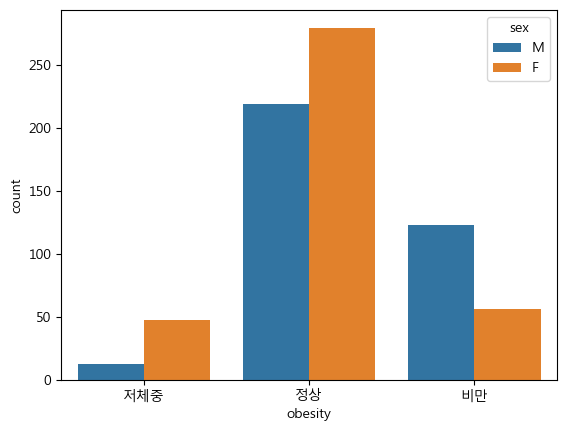

In [19]:
sns.countplot(data = data20s, x = 'obesity', hue = 'sex' )

### 2-3. 여성을 실험군으로 가정하고, 남성 집단(통제군)을 그에 맞춰 재추출하시오. [3점]
즉, 새로운 데이터셋을 만들되 여성은 그대로 두고, 남성은 저체중, 정상, 비만 그룹별 인원이 여성과 같도록 재추출하시오.[2점] 

이후 두 성별에서 저체중, 정상, 비만 인원 수(각 47, 280, 56명)가 일치하는지 확인하시오. (예: 남성, 여성 데이터 결합 후 교차표 생성해서 인원 수 확인 [1점])

In [22]:
mdata_control = pd.DataFrame()
for obesity_i in ['저체중', '정상', '비만'] :
    n_count = len(data20s[(data20s['obesity'] == obesity_i) & (data20s['sex'] == 'F')])
    mdata_control = pd.concat([mdata_control, data20s[(data20s['obesity'] == obesity_i) & (data20s['sex'] == 'M')].sample(n_count, replace= True)])
data_control = pd.concat([mdata_control, data20s[data20s['sex'] == 'F']])
pd.crosstab(data_control.sex, data_control.obesity)

obesity,저체중,정상,비만
sex,,,
F,47,280,56
M,47,280,56


### 2-4. 재추출한 데이터 셋에서, 체중 그룹에 따라 키가 다른지 one-way ANOVA로 검정하시오. 
p값 및 통계적 유의성을 보고할 것.

In [23]:
Glucose1 = data_control[data_control.obesity == '저체중'].height
Glucose2 = data_control[data_control.obesity == '정상'].height
Glucose3 = data_control[data_control.obesity == '비만'].height

oneway_anova_result = stats.f_oneway(Glucose1, Glucose2, Glucose3)
oneway_anova_result

F_onewayResult(statistic=np.float64(0.11520097371170068), pvalue=np.float64(0.8912025186487653))

- p값이 유의수준 0.05보다 크므로 세 개의 집단이 통계적으로 유의하지 않다.

### 2-5. 재추출한 데이터셋에서 stripplot으로 체중그룹별(x축) 키의 분포를 시각화해보시오.

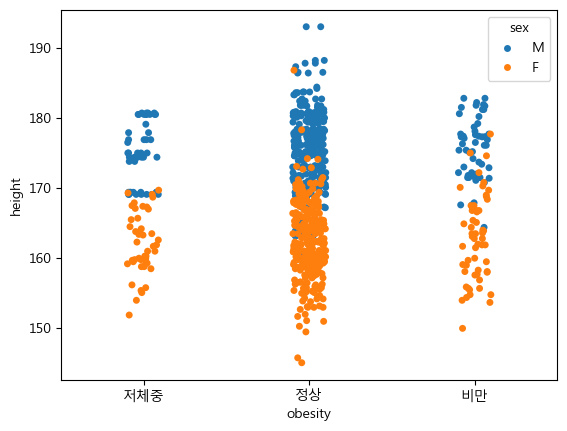

In [24]:
sns.stripplot(data = data_control, x='obesity', y='height', hue='sex')
plt.show()